In [1]:
import pandas as pd

In [2]:
#loading the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/File/CrimeData.csv')
data.head()


Mounted at /content/drive


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
data.shape

(910707, 28)

In [4]:
# Create a DataFrame
cdata = pd.DataFrame(data)

In [5]:
#information
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           910707 non-null  int64  
 1   Date Rptd       910707 non-null  object 
 2   DATE OCC        910707 non-null  object 
 3   TIME OCC        910707 non-null  int64  
 4   AREA            910707 non-null  int64  
 5   AREA NAME       910707 non-null  object 
 6   Rpt Dist No     910707 non-null  int64  
 7   Part 1-2        910707 non-null  int64  
 8   Crm Cd          910707 non-null  int64  
 9   Crm Cd Desc     910707 non-null  object 
 10  Mocodes         783696 non-null  object 
 11  Vict Age        910707 non-null  int64  
 12  Vict Sex        789672 non-null  object 
 13  Vict Descent    789663 non-null  object 
 14  Premis Cd       910697 non-null  float64
 15  Premis Desc     910153 non-null  object 
 16  Weapon Used Cd  315247 non-null  float64
 17  Weapon Des

In [6]:
#selected columns for modelling
col = cdata[['Crm Cd Desc','DATE OCC','TIME OCC','LAT','LON']]

In [7]:
#check nulls on selected columns
col.isnull().values.any()

False

In [8]:
# target variable classes
classes = cdata['Crm Cd Desc'].nunique()
classes

139

In [ ]:
c = cdata['Crm Cd Desc'].unique()

c

In [9]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON
0,VEHICLE - STOLEN,03/01/2020 12:00:00 AM,2130,34.0375,-118.3506
1,BURGLARY FROM VEHICLE,02/08/2020 12:00:00 AM,1800,34.0444,-118.2628
2,BIKE - STOLEN,11/04/2020 12:00:00 AM,1700,34.0210,-118.3002
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),03/10/2020 12:00:00 AM,2037,34.1576,-118.4387
4,THEFT OF IDENTITY,08/17/2020 12:00:00 AM,1200,34.0944,-118.3277


In [10]:
#date of occurence
occdate = cdata['DATE OCC']
occdate

0         03/01/2020 12:00:00 AM
1         02/08/2020 12:00:00 AM
2         11/04/2020 12:00:00 AM
3         03/10/2020 12:00:00 AM
4         08/17/2020 12:00:00 AM
                   ...          
910702    02/17/2024 12:00:00 AM
910703    01/08/2024 12:00:00 AM
910704    01/16/2024 12:00:00 AM
910705    01/31/2024 12:00:00 AM
910706    01/15/2024 12:00:00 AM
Name: DATE OCC, Length: 910707, dtype: object

In [11]:
# Convert 'DATE OCC' column to datetime type and extract only the date part

col.loc[:, 'DATE OCC'] = pd.to_datetime(col['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p').dt.date

In [12]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277


In [ ]:
# Extract 'Year', 'Month', and 'Day' from 'DATE OCC'
# Convert 'DATE OCC' column to datetime type
col['DATE OCC'] = pd.to_datetime(col['DATE OCC'], errors='coerce')

# Extract 'Year', 'Month', and 'Day' from 'DATE OCC'
col.loc[:, 'Year'] = col['DATE OCC'].dt.year
col.loc[:, 'Month'] = col['DATE OCC'].dt.month
col.loc[:, 'Day'] = col['DATE OCC'].dt.day


In [14]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17


In [ ]:
# Extract hour from 'TIME OCC' and assign it to a new column
col['Hour'] = col['TIME OCC'].astype(str).str[:2].astype(int)


In [16]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12


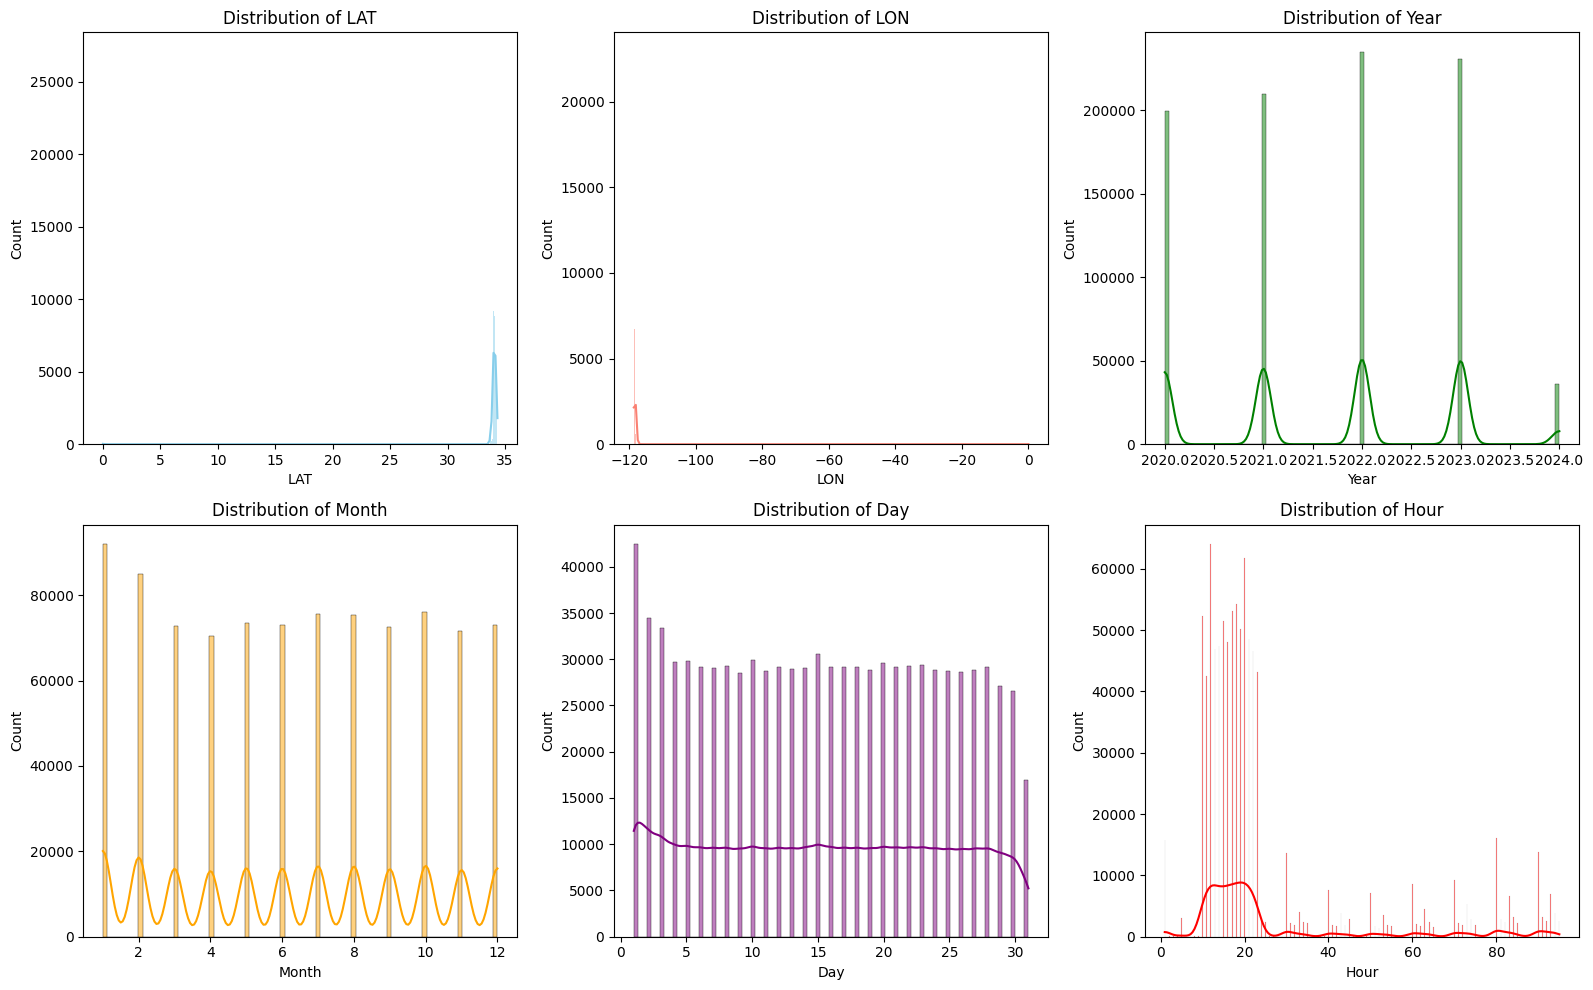

In [17]:
#checking distribution of numeric variables
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution of 'LAT' and 'LON' columns using histograms
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.histplot(col['LAT'], kde=True, color='skyblue')
plt.title('Distribution of LAT')

plt.subplot(2, 3, 2)
sns.histplot(col['LON'], kde=True, color='salmon')
plt.title('Distribution of LON')

# Plot distribution of 'Year', 'Month', 'Day', and 'Hour' using histograms
plt.subplot(2, 3, 3)
sns.histplot(col['Year'], kde=True, color='green')
plt.title('Distribution of Year')

plt.subplot(2, 3, 4)
sns.histplot(col['Month'], kde=True, color='orange')
plt.title('Distribution of Month')

plt.subplot(2, 3, 5)
sns.histplot(col['Day'], kde=True, color='purple')
plt.title('Distribution of Day')

plt.subplot(2, 3, 6)
sns.histplot(col['Hour'], kde=True, color='red')
plt.title('Distribution of Hour')

plt.tight_layout()
plt.show()


In [18]:
#checking for imbalance in data
countcrimes = col['Crm Cd Desc'].value_counts()
print(countcrimes)


Crm Cd Desc
VEHICLE - STOLEN                            97716
BATTERY - SIMPLE ASSAULT                    72353
THEFT OF IDENTITY                           56254
BURGLARY FROM VEHICLE                       56134
BURGLARY                                    55862
                                            ...  
THEFT, COIN MACHINE - ATTEMPT                   5
FIREARMS RESTRAINING ORDER (FIREARMS RO)        4
FAILURE TO DISPERSE                             3
DISHONEST EMPLOYEE ATTEMPTED THEFT              2
TRAIN WRECKING                                  1
Name: count, Length: 139, dtype: int64


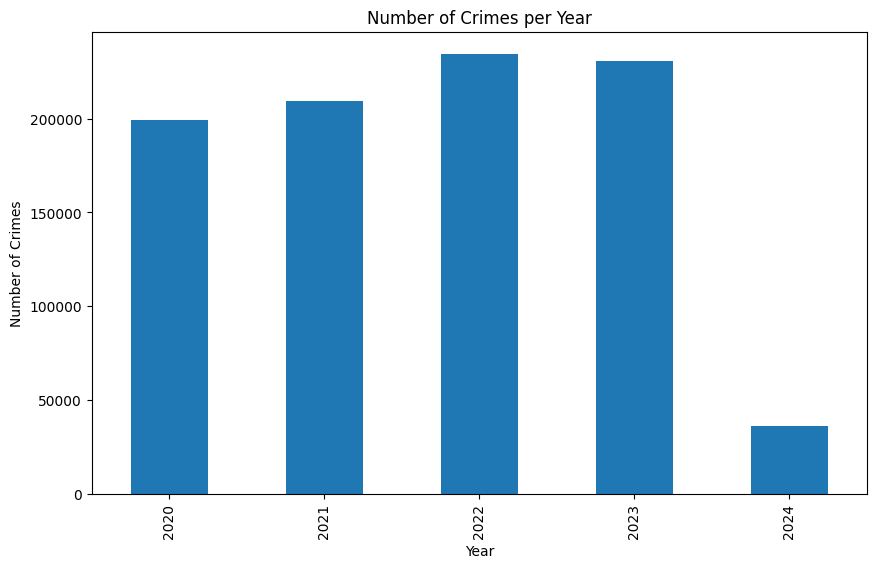

In [ ]:
# year with highest crime
import matplotlib.pyplot as plt

yearcounts = dates['Year'].value_counts().sort_index()

#  bar plot
yearcounts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')

plt.show()

In [ ]:
# Split by the '-' separator
split_dates = datecon.str.split('-')

# Converting the split dates into separate Series for day, month, and year
day = split_dates.str[0]
month = split_dates.str[1]
year = split_dates.str[2]

month_mapping = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

month = month.map(month_mapping)

dates = pd.DataFrame({  'Day': day,'Month': month,'Year': year})
dates

,Day,Month,Year
0,01,March,2020
1,08,February,2020
2,04,November,2020
3,10,March,2020
4,17,August,2020
...,...,...,...
910702,17,February,2024
910703,08,January,2024
910704,16,January,2024
910705,31,January,2024


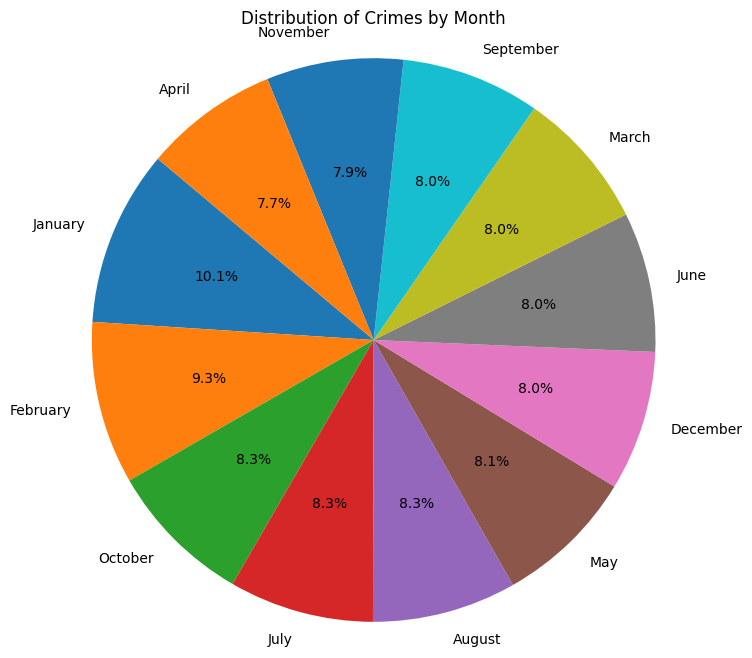

In [ ]:
# month with highest crime
# frequency of each month
monthcounts = dates['Month'].value_counts()

#  pie chart
plt.figure(figsize=(8, 8))
plt.pie(monthcounts, labels=monthcounts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Crimes by Month')

plt.axis('equal')

plt.show()

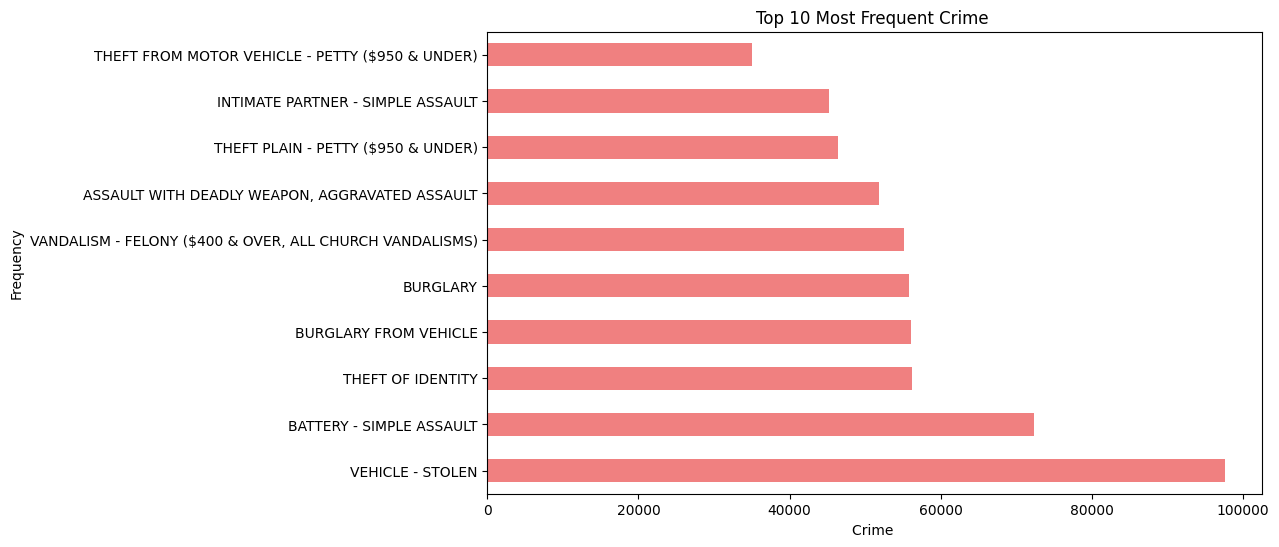

In [ ]:
# Top 10 most frequent crime commited
top10crime = cdata['Crm Cd Desc'].value_counts().nlargest(10)

#  bar chart
plt.figure(figsize=(10, 6))
top10crime.plot(kind='barh', color='lightcoral')

plt.xlabel('Crime ')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Crime ')

plt.show()

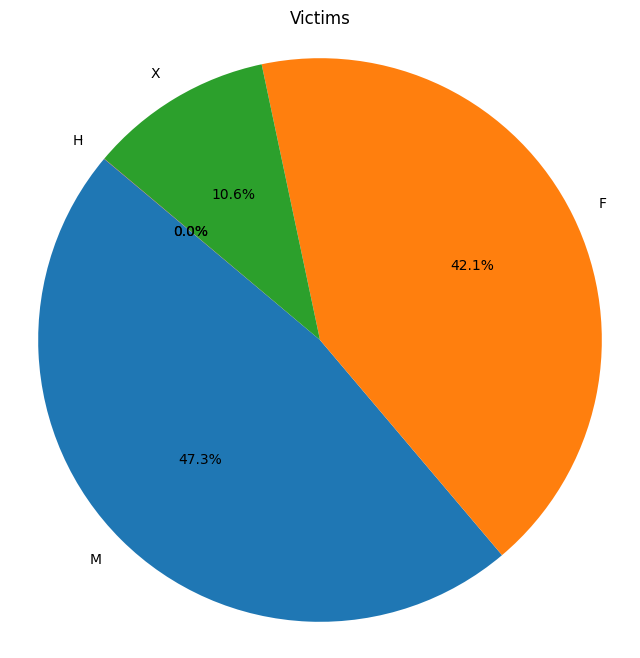

In [ ]:
# Victims by sex
vscounts = cdata['Vict Sex'].value_counts()

#  pie chart
plt.figure(figsize=(8, 8))
plt.pie(vscounts, labels=vscounts.index, autopct='%1.1f%%', startangle=140)

plt.title('Victims')

plt.axis('equal')

plt.show()

In [ ]:
# victims by age
highest_number = cdata['Vict Age'].max()
lowest_number = cdata['Vict Age'].min()

print("Highest number:", highest_number)
print("Lowest number:", lowest_number)

Highest number: 120
Lowest number: -4


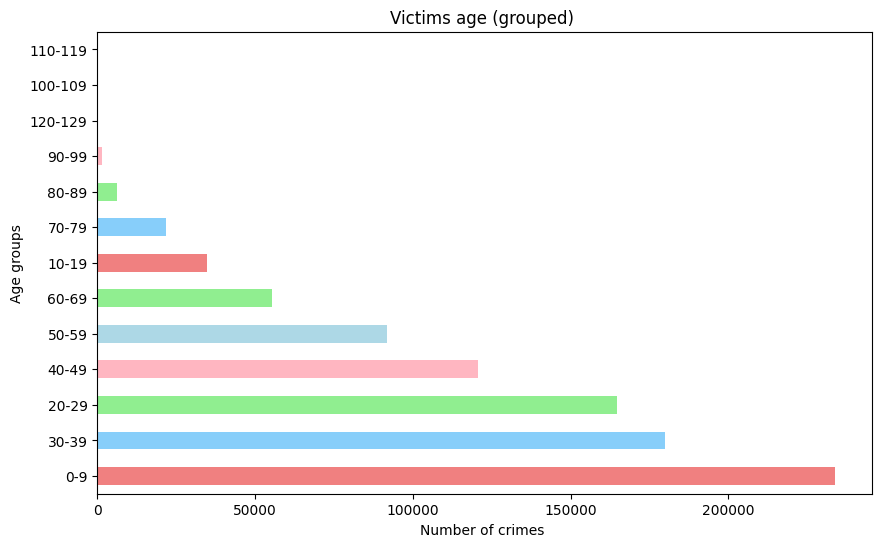

In [ ]:
# victims by age
vacounts = cdata['Age Group'].value_counts()

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue',
          'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink',
          'lightblue', 'lightgreen', 'lightcoral']
#  bar chart
plt.figure(figsize=(10, 6))
vacounts.plot(kind='barh', color=colors)

plt.xlabel('Number of crimes ')
plt.ylabel('Age groups')
plt.title('Victims age (grouped) ')

plt.show()

In [ ]:
#  bins (10-year intervals up to the maximum age)
bins = list(range(0, highest_number + 11, 10))

# age groups
labels = [f'{i}-{i+9}' for i in range(0, highest_number + 1, 10)]

cdata['Age Group'] = pd.cut(cdata['Vict Age'], bins=bins, labels=labels, right=False)



In [ ]:
#  empty dictionary to store the top 10 crimes for each age group
top_crimes_by_group = {}

# Iterate over each age group
for age_group in labels:
    # Filter the data for the current age group
    age_group_data = cdata[cdata['Age Group'] == age_group]

    # Count the occurrences of each crime type in the current age group
    crime_counts = age_group_data['Crm Cd Desc'].value_counts()

    # Sort the crime counts in descending order
    sorted_crime_counts = crime_counts.sort_values(ascending=False)

    # Select the top 10 crimes for the current age group
    top_crimes = sorted_crime_counts.head(10)

    # Store the top 10 crimes in the dictionary
    top_crimes_by_group[age_group] = top_crimes

# Create separate tables for each age group
for age_group, top_crimes in top_crimes_by_group.items():
    # Create a DataFrame for the current age group
    df = pd.DataFrame({'Crime Type': top_crimes.index, 'Count': top_crimes.values})

    # Set the index name
    df.index.name = 'Rank'

    # Display the table for the current age group
    print(f"Top 10 crimes for age group '{age_group}':")
    print(df)
    print()



In [ ]:
import matplotlib.pyplot as plt

# Create separate bar charts for each age group
for age_group, top_crimes in top_crimes_by_group.items():
    # Create a figure and axis for the current age group
    fig, ax = plt.subplots()

    # Plot the bar chart for the current age group
    ax.barh(top_crimes.index, top_crimes.values, color='skyblue')

    # Set the title and labels
    ax.set_title(f"Top 10 crimes for age group '{age_group}'")
    ax.set_xlabel('Count')
    ax.set_ylabel('Crime Type')

    # Invert y-axis to display the bars in descending order
    ax.invert_yaxis()

    # Display the plot
    plt.show()


In [ ]:
col.drop(columns=['Crime type(group1)'], inplace=True)


<ipython-input-49-02a16ceb524f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col.drop(columns=['Crime type(group1)'], inplace=True)


### #MODEL 1

In [19]:
ctgr = {
    'Assault-related Crimes': ['Assault with Deadly Weapon on Police Officer', 'Assault with Deadly Weapon, Aggravated Assault', 'Battery - Simple Assault', 'Battery on a Firefighter', 'Battery Police (Simple)', 'Battery with Sexual Contact', 'Intimate Partner - Aggravated Assault', 'Intimate Partner - Simple Assault', 'Other Assault'],
    'Sexual Offenses': ['Beastiality, Crime Against Nature Sexual Assault with Animal', 'Child Pornography', 'Lewd Conduct', 'Lewd/Lascivious Acts with Child', 'Oral Copulation', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'Rape, Attempted', 'Rape, Forcible', 'Sex Offender Registrant Out of Compliance', 'Sexual Penetration w/Foreign Object', 'Incest (Sexual Acts Between Blood Relatives)', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'],
    'Kidnapping-related Crimes': ['Kidnapping', 'Kidnapping - Grand Attempt', 'Human Trafficking - Commercial Sex Acts', 'Human Trafficking - Involuntary Servitude'],
    'Homicide-related Crimes': ['Criminal Homicide', 'Lynching', 'Manslaughter, Negligent'],
    'Robbery-related Crimes': ['Attempted Robbery', 'Robbery'],
    'Harassment and Threat-related Crimes': ['Criminal Threats - No Weapon Displayed', 'Threatening Phone Calls/Letters', 'Weapons Possession/Bombing', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'],
    'Other Violent Crimes': ['Arson', 'LYNCHING - ATTEMPTED', 'Discharge Firearms/Shots Fired', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT', 'Reckless Driving', 'Shots Fired at Inhabited Dwelling', 'Throwing Object at Moving Vehicle', 'False Imprisonment'],
    'Property-related Crimes': ['Bike - Attempted Stolen', 'Bike - Stolen', 'Boat - Stolen', 'Blocking Door Induction Center', 'Bomb Scare', 'Burglary', 'Burglary from Vehicle', 'Burglary from Vehicle, Attempted', 'Burglary, Attempted', 'Document Forgery / Stolen Felony', 'Document Worthless ($200 & Under)', 'Document Worthless ($200.01 & Over)', 'Driving Without Owner Consent (DWOC)', 'PETTY THEFT - AUTO REPAIR', 'Drunk Roll', 'Extortion', 'Illegal Dumping', 'Trespassing', 'Unauthorized Computer Access', 'Vandalism - Felony ($400 & Over, All Church Vandalisms)', 'Vandalism - Misdemeanor ($399 or Under)', 'Vehicle - Attempt Stolen', 'Vehicle - Stolen', 'Vehicle, Stolen - Other (Motorized Scooters, Bikes, etc)', 'Theft from Motor Vehicle - Attempt', 'Theft from Motor Vehicle - Grand ($950.01 and Over)', 'Train Wrecking', 'Telephone Property - Damage', 'SHOPLIFTING - ATTEMPT', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'THEFT FROM PERSON - ATTEMPT', 'THEFT OF IDENTITY', 'THEFT PLAIN - ATTEMPT', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'THEFT, COIN MACHINE - ATTEMPT', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 'THEFT, PERSON', 'TILL TAP - GRAND THEFT ($950.01 & OVER)', 'TILL TAP - PETTY ($950 & UNDER)'],
    'Fraud-related Crimes': ['Bigamy', 'Bribery', 'Bunko, Attempt', 'Bunko, Grand Theft', 'Bunko, Petty Theft', 'Credit Cards, Fraud Use ($950 & Under)', 'Credit Cards, Fraud Use ($950.01 & Over)', 'Defrauding Innkeeper/Theft of Services, $950 & Under', 'Defrauding Innkeeper/Theft of Services, Over $950.01', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 'False Police Report', 'GRAND THEFT / AUTO REPAIR', 'GRAND THEFT / INSURANCE FRAUD'],
    'White-collar Crimes and Fraud': ['Conspiracy', 'Contempt of Court', 'Counterfeit', 'Dishonest Employee Attempted Theft', 'Dishonest Employee - Grand Theft', 'Dishonest Employee - Petty Theft'],
    'Miscellaneous': ['Brandish Weapon', 'Cruelty to Animals', 'Failure to Disperse', 'Failure to Yield', 'Firearms Emergency Protective Order (Firearms EPO)', 'Firearms Restraining Order (Firearms RO)', 'Inciting a Riot', 'Other Miscellaneous Crime', 'Pandering', 'Peeping Tom', 'Pimping', 'Prowler', 'Purse Snatching', 'Purse Snatching - Attempt', 'Drugs, to a Minor', 'Resisting Arrest', 'Stalking', 'Contributing', 'Violation of Court Order', 'PICKPOCKET', 'PICKPOCKET, ATTEMPT', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER'],
    'Crimes Against Children': ['Child Annoying (17YRS & UNDER)', 'Child Abuse (Physical) - Aggravated Assault', 'Child Abuse (Physical) - Simple Assault', 'Child Neglect (SEE 300 W.I.C.)', 'Child Stealing', 'CRM Against Child (13 or Under) (14-15 & Susp 10 Yrs Older)', 'Child Abandonment'],
    'Disorderly Conduct and Nuisance': ['Disturbing the Peace', 'Disrupt School', 'Indecent Exposure']
}


In [20]:
# Convert all values in the ctgr dictionary to capital letters
ctgr = {key: [item.upper() for item in value] for key, value in ctgr.items()}


In [ ]:
ctgr

In [21]:
# Count the total number of crimes
total_crimes = sum(len(crimes) for crimes in ctgr.values())
print("Total number of crimes:", total_crimes)


Total number of crimes: 139


In [ ]:
# Group crimes by categories
group_c = {category: [] for category in ctgr}

for crime in col['Crm Cd Desc']:
    matched = False
    for category, crimes in ctgr.items():
        if crime in crimes:
            group_c[category].append(crime)
            matched = True
            break

# Create a new column
col.loc[:, 'Crime type(group1)'] = None

for category, crimes_list in group_c.items():
    col.loc[col['Crm Cd Desc'].isin(crimes_list), 'Crime type(group1)'] = category

In [23]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group1)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,Property-related Crimes
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,Property-related Crimes
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,Property-related Crimes
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,Property-related Crimes
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,Property-related Crimes


In [24]:
crime_counts = col['Crime type(group1)'].value_counts()
crime_counts

Crime type(group1)
Property-related Crimes                 537365
Assault-related Crimes                  193596
Miscellaneous                            46142
Robbery-related Crimes                   35811
Harassment and Threat-related Crimes     26769
Sexual Offenses                           9340
Other Violent Crimes                      8517
Crimes Against Children                   6548
Fraud-related Crimes                      4470
White-collar Crimes and Fraud             2833
Disorderly Conduct and Nuisance           2615
Homicide-related Crimes                   1553
Kidnapping-related Crimes                 1537
Name: count, dtype: int64

In [ ]:
total_crimes = len(col['Crime type(group1)'])
print("Total number of crimes:", total_crimes)

Total number of crimes: 910707


In [ ]:
#location unique values
loc = cdata['LOCATION'].nunique()
loc

65177

In [ ]:
# Model building
col.shape

(910707, 10)

In [28]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group1)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,Property-related Crimes
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,Property-related Crimes
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,Property-related Crimes
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,Property-related Crimes
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,Property-related Crimes


In [ ]:
#target variable - label encoding
#assigns a unique integer to each class label.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Check data type of 'Crime type(group1)' column
print(col['Crime type(group1)'].dtype)

# Convert the column to string data type (if needed)
col['Crime type(group1)'] = col['Crime type(group1)'].astype(str)

# Check unique values in 'Crime type(group1)' column
print(col['Crime type(group1)'].unique())

# Fit label encoder and transform target variable
col['Crime type(group1)'] = labelencoder.fit_transform(col['Crime type(group1)'])


In [30]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group1)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,10
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,10
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,10
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,10
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,10


In [31]:
# encoding map
print("Mapping:")
for label, class_name in enumerate(labelencoder.classes_):
    print(f"Encoded label {label} corresponds to crime type: {class_name}")


Mapping:
Encoded label 0 corresponds to crime type: Assault-related Crimes
Encoded label 1 corresponds to crime type: Crimes Against Children
Encoded label 2 corresponds to crime type: Disorderly Conduct and Nuisance
Encoded label 3 corresponds to crime type: Fraud-related Crimes
Encoded label 4 corresponds to crime type: Harassment and Threat-related Crimes
Encoded label 5 corresponds to crime type: Homicide-related Crimes
Encoded label 6 corresponds to crime type: Kidnapping-related Crimes
Encoded label 7 corresponds to crime type: Miscellaneous
Encoded label 8 corresponds to crime type: None
Encoded label 9 corresponds to crime type: Other Violent Crimes
Encoded label 10 corresponds to crime type: Property-related Crimes
Encoded label 11 corresponds to crime type: Robbery-related Crimes
Encoded label 12 corresponds to crime type: Sexual Offenses
Encoded label 13 corresponds to crime type: White-collar Crimes and Fraud


In [ ]:
# Random Forest - robust to overfitting,data does not have to be normally distributed, can handle non-linear relationships,can handle imbalanced datasets
#Model 1

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X = col[['LAT', 'LON', 'Year', 'Month', 'Day','Hour']]
y = col['Crime type(group1)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6157174072976029


In [ ]:
from sklearn.metrics import classification_report
report1 = classification_report(y_test, y_pred)

In [ ]:
print (report1)

              precision    recall  f1-score   support

           0       0.48      0.26      0.34     38589
           1       0.52      0.11      0.18      1346
           2       0.65      0.06      0.11       577
           3       0.55      0.15      0.24       877
           4       0.57      0.08      0.14      5280
           5       0.16      0.03      0.05       320
           6       0.47      0.07      0.13       307
           7       0.50      0.08      0.14      9185
           8       0.20      0.02      0.03      6664
           9       0.58      0.12      0.20      1713
          10       0.64      0.93      0.76    107609
          11       0.16      0.01      0.03      7148
          12       0.61      0.08      0.15      1949
          13       0.56      0.05      0.09       578

    accuracy                           0.62    182142
   macro avg       0.48      0.15      0.19    182142
weighted avg       0.56      0.62      0.54    182142



In [ ]:
# Make predictions
new_data = [[34.0375, -118.3506, 2020, 3, 1,21], [34.0444, -118.2628, 2020, 2, 8,16]]
predicted_crimes = clf.predict(new_data)
print("Predicted crimes:", predicted_crimes)


Predicted crimes: [10 10]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# ##MODEL 2

In [13]:
group2 = {
    'Infraction': ["FAILURE TO YIELD", "ILLEGAL DUMPING", "REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)"],
    'Misdemeanor': ["BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",
    "Bike - Attempted Stolen",
    "BIKE - STOLEN",
    "Battery - Simple Assault",
    "BLOCKING DOOR INDUCTION CENTER",
    "BOAT - STOLEN",
    "BRANDISH WEAPON",
    "BOMB SCARE",
    "BUNCO, PETTY THEFT",
    "BURGLARY, ATTEMPTED",
    "CHILD NEGLECT (SEE 300 W.I.C.)",
    "CONTEMPT OF COURT",
    "CONTRIBUTING",
    "CREDIT CARDS, FRAUD USE ($950 & UNDER)",
    "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER",
    "DISHONEST EMPLOYEE - PETTY THEFT",
    "DISHONEST EMPLOYEE ATTEMPTED THEFT",
    "DISRUPT SCHOOL",
    "DOCUMENT WORTHLESS ($200 & UNDER)",
    "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",
    "FAILURE TO DISPERSE",
    "FALSE POLICE REPORT",
    "FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)",
    "INCITING A RIOT",
    "INDECENT EXPOSURE",
    "LETTERS, LEWD  -  TELEPHONE CALLS, LEWD",
    "INTIMATE PARTNER - SIMPLE ASSAULT",
    "LEWD CONDUCT",
    "PEEPING TOM",
    "PETTY THEFT - AUTO REPAIR",
    "PICKPOCKET",
    "PICKPOCKET, ATTEMPT",
    "PROWLER",
    "RECKLESS DRIVING",
    "RESISTING ARREST",
    "SHOPLIFTING - PETTY THEFT ($950 & UNDER)",
    "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
    "THEFT PLAIN - PETTY ($950 & UNDER)",
    "THEFT, COIN MACHINE - PETTY ($950 & UNDER)",
    "THREATENING PHONE CALLS/LETTERS",
    "TILL TAP - PETTY ($950 & UNDER)",
    "TRESPASSING",
    "VANDALISM - MISDEAMEANOR ($399 OR UNDER)",
    "VIOLATION OF COURT ORDER",
    "VIOLATION OF RESTRAINING ORDER",
    "VIOLATION OF TEMPORARY RESTRAINING ORDER"],
    'Felony': [ "Arson",
    "ATTEMPTED ROBBERY",
    "BRIBERY",
    "CHILD ABANDONMENT",
    "CREDIT CARDS, FRAUD USE ($950.01 & OVER)",
    "CRIMINAL HOMICIDE",
    "DOCUMENT WORTHLESS ($200.01 & OVER)",
    "DRUGS, TO A MINOR",
    "DRUNK ROLL",
    "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",
    "EXTORTION",
    "GRAND THEFT / INSURANCE FRAUD",
    "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS",
    "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE",
    "INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)",
    "INTIMATE PARTNER - AGGRAVATED ASSAULT",
    "KIDNAPPING",
    "KIDNAPPING - GRAND ATTEMPT",
    "LEWD/LASCIVIOUS ACTS WITH CHILD",
    "ORAL COPULATION",
    "PANDERING",
    "PIMPING",
    "RAPE, ATTEMPTED",
    "RAPE, FORCIBLE",
    "ROBBERY",
    "SEXUAL PENETRATION W/FOREIGN OBJECT",
    "SHOTS FIRED AT INHABITED DWELLING",
    "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",
    "STALKING",
    "TRAIN WRECKING",
    "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)"],
    'Wobbler': ["Assault with Deadly Weapon, Aggravated Assault",
    "Assault with Deadly Weapon on Police Officer",
    "Battery on a Firefighter",
    "Battery Police (Simple)",
    "Battery with Sexual Contact",
    "BIGAMY",
    "BUNCO, ATTEMPT",
    "BUNCO, GRAND THEFT",
    "BURGLARY",
    "BURGLARY FROM VEHICLE",
    "BURGLARY FROM VEHICLE, ATTEMPTED",
    "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT",
    "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
    "CHILD ANNOYING (17YRS & UNDER)",
    "CHILD PORNOGRAPHY",
    "CHILD STEALING",
    "CONSPIRACY",
    "COUNTERFEIT",
    "CRIMINAL THREATS - NO WEAPON DISPLAYED",
    "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)",
    "CRUELTY TO ANIMALS",
    "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01",
    "DISCHARGE FIREARMS/SHOTS FIRED",
    "DISHONEST EMPLOYEE - GRAND THEFT",
    "DISTURBING THE PEACE",
    "DOCUMENT FORGERY / STOLEN FELONY",
    "DRIVING WITHOUT OWNER CONSENT (DWOC)",
    "FALSE IMPRISONMENT",
    "FIREARMS RESTRAINING ORDER (FIREARMS RO)",
    "GRAND THEFT / AUTO REPAIR",
    "LYNCHING",
    "LYNCHING - ATTEMPTED",
    "MANSLAUGHTER, NEGLIGENT",
    "PICKPOCKET",
    "PICKPOCKET, ATTEMPT",
    "PURSE SNATCHING",
    "PURSE SNATCHING - ATTEMPT",
    "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
    "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
    "SHOPLIFTING - ATTEMPT",
    "SHOPLIFTING-GRAND THEFT ($950.01 & OVER)",
    "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
    "TELEPHONE PROPERTY - DAMAGE",
    "THEFT FROM MOTOR VEHICLE - ATTEMPT",
    "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
    "THEFT FROM PERSON - ATTEMPT",
    "THEFT OF IDENTITY",
    "THEFT PLAIN - ATTEMPT",
    "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",
    "THEFT, COIN MACHINE - ATTEMPT",
    "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",
    "THEFT, PERSON",
    "THROWING OBJECT AT MOVING VEHICLE",
    "TILL TAP - GRAND THEFT ($950.01 & OVER)",
    "UNAUTHORIZED COMPUTER ACCESS",
    "VEHICLE - ATTEMPT STOLEN",
    "VEHICLE - STOLEN",
    "VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",
    "WEAPONS POSSESSION/BOMBING"]
}


In [14]:
# Convert all values in the group2 dictionary to capital letters
group2 = {key: [item.upper() for item in value] for key, value in group2.items()}


In [ ]:
group2

In [15]:
# Count the total number of crimes
tcrime = sum(len(crimes) for crimes in group2.values())
print("Total number of crimes:", tcrime)


Total number of crimes: 139


In [16]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12


In [17]:

# Group crimes by categories in group2
group2category = {category: [] for category in group2}

for crime in col['Crm Cd Desc']:
    matched = False
    for category, crimes in group2.items():
        if crime in crimes:
            group2category[category].append(crime)
            matched = True
            break

# Create a new column
col['Crime type(group2)'] = None

for category, crimeslist in group2category.items():
    col.loc[col['Crm Cd Desc'].isin(crimeslist), 'Crime type(group2)'] = category


<ipython-input-17-af204d1e2cb6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['Crime type(group2)'] = None


In [18]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group2)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,Wobbler
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,Wobbler
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,Misdemeanor
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,Wobbler
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,Wobbler


In [19]:
#number of crimes in each group
counts = col['Crime type(group2)'].value_counts()
counts

Crime type(group2)
Wobbler        449356
Misdemeanor    325351
Felony         123600
Infraction       1583
Name: count, dtype: int64

In [ ]:
#target variable - label encoding
#assigns a unique integer to each class label.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Check data type of 'Crime type(group1)' column
print(col['Crime type(group2)'].dtype)

# Convert the column to string data type (if needed)
col['Crime type(group2)'] = col['Crime type(group2)'].astype(str)

# Fit label encoder and transform target variable
col['Crime type(group2)'] = labelencoder.fit_transform(col['Crime type(group2)'])

In [21]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group2)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,4
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,4
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,2
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,4
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,4


In [22]:
# encoding map
print("Mapping:")
for label, class_name in enumerate(labelencoder.classes_):
    print(f"Encoded label {label} corresponds to crime type: {class_name}")


Mapping:
Encoded label 0 corresponds to crime type: Felony
Encoded label 1 corresponds to crime type: Infraction
Encoded label 2 corresponds to crime type: Misdemeanor
Encoded label 3 corresponds to crime type: None
Encoded label 4 corresponds to crime type: Wobbler


In [ ]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Crm Cd Desc         910707 non-null  object        
 1   DATE OCC            910707 non-null  datetime64[ns]
 2   TIME OCC            890967 non-null  datetime64[ns]
 3   LAT                 910707 non-null  float64       
 4   LON                 910707 non-null  float64       
 5   Year                910707 non-null  int32         
 6   Month               910707 non-null  int32         
 7   Day                 910707 non-null  int32         
 8   Crime type(group2)  910707 non-null  int64         
 9   Hour                890967 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int32(3), int64(1), object(1)
memory usage: 59.1+ MB


In [23]:
# Random Forest - robust to overfitting,performs well with high-dimensional data, can handle non-linear relationships,can handle imbalanced datasets
#Model 2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Prepare the data
f = col[['LAT', 'LON', 'Year', 'Month', 'Day','Hour']]
t = col['Crime type(group2)']

# Split the data into training and testing sets
f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.2, random_state=42)

# Build the model
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model2.fit(f_train, t_train)


RandomForestClassifier(random_state=42)

In [24]:
# Evaluate the model2
from sklearn.metrics import accuracy_score

t_pred = model2.predict(f_test)
accuracymodel2 = accuracy_score(t_test, t_pred)
print("Accuracy:", accuracymodel2)

Accuracy: 0.5064565009717693


In [25]:
from sklearn.metrics import classification_report
report2 = classification_report(t_test, t_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.28      0.06      0.09     24797
           1       0.06      0.00      0.01       309
           2       0.46      0.39      0.42     64976
           3       0.43      0.05      0.09      2185
           4       0.54      0.73      0.62     89875

    accuracy                           0.51    182142
   macro avg       0.35      0.25      0.25    182142
weighted avg       0.47      0.51      0.47    182142



In [26]:
# Make predictions using model 2
testdata = [[34.0375, -118.3506, 2020, 3, 1,21], [34.0444, -118.2628, 2020, 2, 8,16]]
predictedcrimes = model2.predict(testdata)
print("Predicted crimes:", predictedcrimes)


Predicted crimes: [4 4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


##MODEL 3

In [27]:
group3 = {
    'Crimes involving person/s': ["ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER",
        "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",
        "ATTEMPTED ROBBERY",
        "BATTERY - SIMPLE ASSAULT",
        "BATTERY ON A FIREFIGHTER",
        "BATTERY POLICE (SIMPLE)",
        "BATTERY WITH SEXUAL CONTACT",
        "BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",
        "BIGAMY",
        "BLOCKING DOOR INDUCTION CENTER",
        "BOMB SCARE",
        "BRANDISH WEAPON",
        "BRIBERY",
        "BUNCO, ATTEMPT",
        "BUNCO, GRAND THEFT",
        "BUNCO, PETTY THEFT",
        "CHILD ABANDONMENT",
        "CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT",
        "CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT",
        "CHILD ANNOYING (17YRS & UNDER)",
        "CHILD NEGLECT (SEE 300 W.I.C.)",
        "CHILD PORNOGRAPHY",
        "CHILD STEALING",
        "CONSPIRACY",
        "CONTEMPT OF COURT",
        "CONTRIBUTING",
        "COUNTERFEIT",
        "CREDIT CARDS, FRAUD USE ($950 & UNDER)",
        "CREDIT CARDS, FRAUD USE ($950.01 & OVER)",
        "CRIMINAL HOMICIDE",
        "CRIMINAL THREATS - NO WEAPON DISPLAYED",
        "CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)",
        "CRUELTY TO ANIMALS",
        "DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER",
        "DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01",
        "DISCHARGE FIREARMS/SHOTS FIRED",
        "DISHONEST EMPLOYEE - GRAND THEFT",
        "DISHONEST EMPLOYEE - PETTY THEFT",
        "DISHONEST EMPLOYEE ATTEMPTED THEFT",
        "DISRUPT SCHOOL",
        "DISTURBING THE PEACE",
        "DRIVING WITHOUT OWNER CONSENT (DWOC)",
        "DRUGS, TO A MINOR",
        "DRUNK ROLL",
        "EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",
        "EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",
        "EXTORTION",
        "FAILURE TO DISPERSE",
        "FAILURE TO YIELD",
        "FALSE IMPRISONMENT",
        "FALSE POLICE REPORT",
        "FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)",
        "FIREARMS RESTRAINING ORDER (FIREARMS RO)",
        "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS",
        "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE",
        "INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)",
        "INCITING A RIOT",
        "INDECENT EXPOSURE",
        "INTIMATE PARTNER - AGGRAVATED ASSAULT",
        "INTIMATE PARTNER - SIMPLE ASSAULT",
        "KIDNAPPING",
        "KIDNAPPING - GRAND ATTEMPT",
        "LETTERS, LEWD  -  TELEPHONE CALLS, LEWD",
        "LEWD CONDUCT",
        "LEWD/LASCIVIOUS ACTS WITH CHILD",
        "LYNCHING",
        "LYNCHING - ATTEMPTED",
        "MANSLAUGHTER, NEGLIGENT",
        "ORAL COPULATION",
        "OTHER ASSAULT",
        "PANDERING",
        "PEEPING TOM",
        "PICKPOCKET",
        "PICKPOCKET, ATTEMPT",
        "PIMPING",
        "PROWLER",
        "PURSE SNATCHING",
        "PURSE SNATCHING - ATTEMPT",
        "RAPE, ATTEMPTED",
        "RAPE, FORCIBLE",
        "RECKLESS DRIVING",
        "RESISTING ARREST",
        "ROBBERY",
        "SEX OFFENDER REGISTRANT OUT OF COMPLIANCE",
        "SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",
        "SEXUAL PENETRATION W/FOREIGN OBJECT",
        "SHOTS FIRED AT INHABITED DWELLING",
        "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",
        "SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH",
        "STALKING",
        "THEFT FROM PERSON - ATTEMPT",
        "THEFT OF IDENTITY",
        "THEFT PLAIN - ATTEMPT",
        "THEFT PLAIN - PETTY ($950 & UNDER)",
        "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",
        "THEFT, PERSON",
        "THREATENING PHONE CALLS/LETTERS",
        "THROWING OBJECT AT MOVING VEHICLE",
        "TRESPASSING",
        "UNAUTHORIZED COMPUTER ACCESS",
        "VIOLATION OF COURT ORDER",
        "VIOLATION OF RESTRAINING ORDER",
        "VIOLATION OF TEMPORARY RESTRAINING ORDER",
        "WEAPONS POSSESSION/BOMBING"],
    'Crimes involving property': ["ARSON",
        "BIKE - ATTEMPTED STOLEN",
        "BIKE - STOLEN",
        "BOAT - STOLEN",
        "BURGLARY",
        "BURGLARY FROM VEHICLE",
        "BURGLARY FROM VEHICLE, ATTEMPTED",
        "BURGLARY, ATTEMPTED",
        "DOCUMENT FORGERY / STOLEN FELONY",
        "DOCUMENT WORTHLESS ($200 & UNDER)",
        "DOCUMENT WORTHLESS ($200.01 & OVER)",
        "GRAND THEFT / AUTO REPAIR",
        "GRAND THEFT / INSURANCE FRAUD",
        "ILLEGAL DUMPING",
        "PETTY THEFT - AUTO REPAIR",
        "SHOPLIFTING - ATTEMPT",
        "SHOPLIFTING - PETTY THEFT ($950 & UNDER)",
        "SHOPLIFTING-GRAND THEFT ($950.01 & OVER)",
        "TELEPHONE PROPERTY - DAMAGE",
        "THEFT FROM MOTOR VEHICLE - ATTEMPT",
        "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
        "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
        "THEFT, COIN MACHINE - ATTEMPT",
        "THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",
        "THEFT, COIN MACHINE - PETTY ($950 & UNDER)",
        "TILL TAP - GRAND THEFT ($950.01 & OVER)",
        "TILL TAP - PETTY ($950 & UNDER)",
        "TRAIN WRECKING",
        "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",
        "VANDALISM - MISDEMEANOR ($399 OR UNDER)",
        "VEHICLE - ATTEMPT STOLEN",
        "VEHICLE - STOLEN",
        "VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",
        "REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)"]

}


In [28]:
# Convert all values in the group3 dictionary to capital letters
group3 = {key: [item.upper() for item in value] for key, value in group3.items()}


In [29]:
# Count the total number of crimes
nocrimes = sum(len(crimes) for crimes in group3.values())
print("Total number of crimes:", nocrimes)


Total number of crimes: 138


In [30]:
# Group crimes by categories in group3
group3category = {category: [] for category in group3}

for crime in col['Crm Cd Desc']:
    matched = False
    for category, crimes in group3.items():
        if crime in crimes:
            group3category[category].append(crime)
            matched = True
            break

# Create a new column
col['Crime type(group3)'] = None

for category, crimeslist in group3category.items():
    col.loc[col['Crm Cd Desc'].isin(crimeslist), 'Crime type(group3)'] = category


<ipython-input-30-5c0da1982b14>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['Crime type(group3)'] = None


In [31]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group2),Crime type(group3)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,4,Crimes involving property
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,4,Crimes involving property
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,2,Crimes involving property
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,4,Crimes involving property
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,4,Crimes involving person/s


In [32]:
#number of crimes in each group
counts = col['Crime type(group3)'].value_counts()
counts

Crime type(group3)
Crimes involving person/s    495119
Crimes involving property    385273
Name: count, dtype: int64

In [ ]:
#target variable - label encoding

#assigns a unique integer to each class label.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Check data type of 'Crime type(group1)' column
print(col['Crime type(group3)'].dtype)

# Convert the column to string data type (if needed)
col['Crime type(group3)'] = col['Crime type(group3)'].astype(str)

# Fit label encoder and transform target variable
col['Crime type(group3)'] = labelencoder.fit_transform(col['Crime type(group3)'])

In [34]:
# encoding map
print("Mapping:")
for label, class_name in enumerate(labelencoder.classes_):
    print(f"Encoded label {label} corresponds to crime type: {class_name}")

Mapping:
Encoded label 0 corresponds to crime type: Crimes involving person/s
Encoded label 1 corresponds to crime type: Crimes involving property
Encoded label 2 corresponds to crime type: None


In [35]:
col.head()

,Crm Cd Desc,DATE OCC,TIME OCC,LAT,LON,Year,Month,Day,Hour,Crime type(group2),Crime type(group3)
0,VEHICLE - STOLEN,2020-03-01,2130,34.0375,-118.3506,2020,3,1,21,4,1
1,BURGLARY FROM VEHICLE,2020-02-08,1800,34.0444,-118.2628,2020,2,8,18,4,1
2,BIKE - STOLEN,2020-11-04,1700,34.0210,-118.3002,2020,11,4,17,2,1
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2020-03-10,2037,34.1576,-118.4387,2020,3,10,20,4,1
4,THEFT OF IDENTITY,2020-08-17,1200,34.0944,-118.3277,2020,8,17,12,4,0


In [ ]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Crm Cd Desc         910707 non-null  object 
 1   TIME OCC            910707 non-null  object 
 2   LAT                 910707 non-null  float64
 3   LON                 910707 non-null  float64
 4   Hour                910707 non-null  int64  
 5   Year                910707 non-null  int32  
 6   Month               910707 non-null  int32  
 7   Day                 910707 non-null  int32  
 8   Minute              873407 non-null  Int64  
 9   Crime type(group2)  910707 non-null  int64  
 10  Crime type(group3)  910707 non-null  int64  
dtypes: Int64(1), float64(2), int32(3), int64(3), object(2)
memory usage: 66.9+ MB


In [36]:
# Random Forest - robust to overfitting,performs well with high-dimensional data, can handle non-linear relationships,can handle imbalanced datasets
#Model 3

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Prepare the data
ft = col[['LAT', 'LON', 'Year', 'Month', 'Day','Hour']]
tg = col['Crime type(group3)']

# Split the data into training and testing sets
ft_train, ft_test, tg_train, tg_test = train_test_split(ft, tg, test_size=0.2, random_state=42)

# Build the model
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model3.fit(ft_train, tg_train)


RandomForestClassifier(random_state=42)

In [37]:
# Evaluate the model3
from sklearn.metrics import accuracy_score

tg_pred = model3.predict(ft_test)
accuracymodel3 = accuracy_score(tg_test, tg_pred)
print("Accuracy:", accuracymodel3)

Accuracy: 0.5999110584049807


In [38]:
from sklearn.metrics import classification_report
report3 = classification_report(tg_test, tg_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     99167
           1       0.56      0.48      0.52     76930
           2       0.23      0.02      0.03      6045

    accuracy                           0.60    182142
   macro avg       0.47      0.41      0.41    182142
weighted avg       0.58      0.60      0.58    182142



In [39]:
# Make predictions using model 3
testdata3 = [[34.0375, -118.3506, 2020, 3, 1,21], [34.0444, -118.2628, 2020, 2, 8,16]]
predictedgroup = model3.predict(testdata3)
print("Predicted crimes:", predictedgroup)


Predicted crimes: [1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
